In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context("paper", font_scale=1.6)

def fasta_reader(file):
    '''Converts .fasta to a pandas dataframe with accession as index
    and sequence in a column 'sequence'
    '''
    fasta_df = pd.read_csv(file, sep='>', lineterminator='>', header=None)
    fasta_df[['Accession', 'Sequence']] = fasta_df[0].str.split('\n', 1, \
                                        expand=True)
    fasta_df['Accession'] = fasta_df['Accession']
    fasta_df['Sequence'] = fasta_df['Sequence'].replace('\n', '', regex=True).\
                            astype(str).str.upper().replace('U', 'T')
    total_seq = fasta_df.shape[0]
    fasta_df.drop(0, axis=1, inplace=True)
    fasta_df = fasta_df[fasta_df.Sequence != '']
    fasta_df = fasta_df[fasta_df.Sequence != 'NONE']
    final_df = fasta_df.dropna()
    remained_seq = final_df.shape[0]
    if total_seq != remained_seq:
        print("{} sequences were removed due to inconsistencies in"
                      "provided file.".format(total_seq-remained_seq))
    return final_df


In [2]:
# Reviewed seqs

df = pd.read_pickle('uniprot_reviewed_scored.pkl.gz')
cols = ['SP', 'Y', 'C', 'All_Cleavage', 'Fungi_Preds', 'Fungi_prob', 'Toxin_Preds', 'Toxin_prob']

tox_fung = df[df['Preds'].apply(len) == 8].copy()

tox_fung[cols] = pd.DataFrame(tox_fung.Preds.tolist(), index= tox_fung.index)
#Take those with 5 models returning True for toxins
probable_sp = tox_fung[tox_fung['SP'].apply(lambda x: (x == True).sum()) == 5].copy()

probable_toxins = probable_sp[probable_sp['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == 5].copy()
print('Reviewed set has {} probable toxins.'.format(probable_toxins.shape[0]))
print('====\n')
print(','.join([i for i in probable_toxins.Accession.str.split('|').apply(lambda x: x[1]).values]))
print('====\n')

Reviewed set has 1045 probable toxins.
====

B0S5A7,Q8MMH0,A8HDK4,Q9NDG8,F8J2F2,P60302,P17696,Q86JG6,P84639,P83400,P13661,O73856,F5CPE4,Q53B61,P60814,P15818,Q91FS3,Q9YGI2,A8HDJ8,Q9YGH9,Q2VBP0,Q8AY56,P58370,Q9YGX1,A0A2P1BSU3,Q98957,O73857,P0DKR6,Q8AY52,P0C554,Q2VBP4,Q9YGJ0,Q8AY49,Q4LCT3,Q2ES49,C1IC50,Q2ES46,Q9W728,B5L5N4,Q9UYS2,Q75JQ0,Q6X5T2,O22415,P00991,B2KTG2,Q2ES47,H6VC05,Q9NH75,P0CI59,D1MGU1,Q6X5T3,P0C292,B1P1I5,A8Y7P1,B5L5N2,P43993,Q6X5S1,F2YLA3,P60214,Q1I163,E7CLP6,E7CLP3,P14499,O51058,B5L5N6,Q9FK10,Q9ZDB2,Q6X5T0,F8J2F3,Q1RPT0,Q2ES48,Q1RPS8,A6MFL3,B5L5N1,B5L5P4,Q54LY1,Q7YT61,Q5FZI6,Q5ZPJ7,P32223,B5L5P0,B5L5P9,B5L5P6,B5G6H1,Q869Z0,Q71RQ9,Q8AY43,Q9ZED1,Q95WD2,M4GX67,P86405,P0CI51,B5U6Y7,P0DSJ6,A7X3V4,Q6T6T5,B4ESA3,A6MFL1,P0DJ50,G9I929,B5KL30,A5X2X1,P00992,A8Y7P0,B5L5P7,B5G6H5,O35982,B4ESA2,B0VXV1,D9U2A1,Q4PRD0,P23807,Q4PRC6,Q696W1,Q557G4,B4XT03,B4XSY4,Q8AYA3,P08026,Q58768,Q4LCS8,A0A0R4I951,Q6ITB2,P0DMZ5,B4ESA4,C1IC52,I2G9B4,Q8AY46,P00989,P86870,B5G6H4,B5L5P3,Q559I8,A6LVG3,Q54ST6,P3

In [3]:
probable_sp.to_pickle('all_toxins_predicted.pkl.gz')

In [291]:
# probable_sp[probable_sp['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == 4].copy()

### Uniprot ID mapping

In [4]:
df_uniprot = pd.read_csv('uniprot-yourlist M20201114A94466D2655679D1FD8953E075198DA811DD20E.tab.gz', sep='\t')

In [5]:
train = pd.read_pickle('../results/toxin_nontoxin.pkl.gz')
df_uniprot = df_uniprot[df_uniprot['Entry'].apply(lambda x: x not in train.Entry.values)].copy()

In [5]:
df_uniprot[df_uniprot['Protein families'].apply(lambda x: 'Cytochrome' in str(x))]

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Protein families,Domain [CC],...,Gene ontology (molecular function),Cross-reference (Allergome),Allergenic properties,Involvement in disease,Toxic dose,Pharmaceutical use,Biotechnological use,Motif,Domain [FT],Transmembrane
471,O73853,CP17A_ICTPU,reviewed,"Steroid 17-alpha-hydroxylase/17,20 lyase (EC 1...",cyp17a1 cyp17,Ictalurus punctatus (Channel catfish) (Silurus...,514,NaN,Cytochrome P450 family,NaN,...,17-alpha-hydroxyprogesterone aldolase activity...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,Q9ASR3,C7091_ARATH,reviewed,Cytochrome P450 709B1 (EC 1.14.-.-),CYP709B1 At2g46960,Arabidopsis thaliana (Mouse-ear cress),519,NaN,Cytochrome P450 family,NaN,...,heme binding [GO:0020037]; iron ion binding [G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 1..21; /note=""Helical""; /evidence=""..."
567,P37119,C71A3_SOLME,reviewed,Cytochrome P450 71A3 (EC 1.14.-.-) (CYPLXXIA3)...,CYP71A3 CYPEG3,Solanum melongena (Eggplant) (Aubergine),365,NaN,Cytochrome P450 family,NaN,...,heme binding [GO:0020037]; iron ion binding [G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,B5UAQ8,C7195_ESCCA,reviewed,Cheilanthifoline synthase (CHS) (EC 1.14.19.65...,CYP719A5,Eschscholzia californica (California poppy),490,NaN,Cytochrome P450 family,NaN,...,(S)-cheilanthifoline synthase activity [GO:004...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 2..22; /note=""Helical""; /evidence=""..."


In [6]:

## Sequences

seq_df = fasta_reader('uniprot-yourlist M20201114A94466D2655679D1FD8953E075198DA811DD20E.fasta.gz',)
seq_df['Entry'] = seq_df['Accession'].str.split('|').apply(lambda x: x[1])
seq_df.head()

,Accession,Sequence,Entry
0,sp|B0S5A7|CTL5B_DANRE Choline transporter-like...,GCTDVLCCVIFVIVILGYIVLGTVAWMHGDPRKVVYPTDSYGQFCG...,B0S5A7
1,sp|Q8MMH0|CVP7_PIMHY Cysteine-rich venom prote...,MSKVFVIILVALMVAISIASAHRPPPNPRCLPGHSKCKYEPKKNSC...,Q8MMH0
2,sp|A8HDK4|3L21_TROCA Long neurotoxin 1 OS=Trop...,MKTLLLTLVVVTIVCLDLGNSFSCYKTPHVKSEPCAPGQNLCYTKT...,A8HDK4
3,sp|Q9NDG8|ACE4_CAEBR Acetylcholinesterase 4 OS...,MKPKLVFLPFLIFITVFIEESEAVHPVVLETKLGDIRGNEFFFLSK...,Q9NDG8
4,sp|F8J2F2|3L220_DRYCN Long neurotoxin 20 OS=Dr...,MKTLLLTLVVVTIVCLDLGNSFSCYKTPYVKSEPCAPGENLCYTKS...,F8J2F2


In [7]:
df_uniprot = df_uniprot.merge(seq_df, on='Entry')
df_uniprot.shape

(910, 29)

### Remove bacteria

In [9]:

bacteria = df_uniprot[df_uniprot['Taxonomic lineage (all)'].apply(lambda x: 'Bacteria' in x)].copy()
bacteria.shape

(47, 29)

In [15]:
# bacteria

#### Remove archaea

In [16]:

archaea = df_uniprot[df_uniprot['Taxonomic lineage (all)'].apply(lambda x: 'Archaea' in x)].copy()
archaea.shape

(3, 29)

In [17]:
filtered_ = df_uniprot[df_uniprot.Entry.apply(lambda x: x not in \
                                              list(set(bacteria.Entry.values)) 
                                              + list(set( archaea.Entry.values)))].copy()
filtered_.shape

(860, 29)

#### Remove transmembranes

In [18]:
trans_ = filtered_[~filtered_['Transmembrane'].isna()].copy()
trans = trans_[trans_['Signal peptide'].isna()].copy()
trans

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Protein families,Domain [CC],...,Allergenic properties,Involvement in disease,Toxic dose,Pharmaceutical use,Biotechnological use,Motif,Domain [FT],Transmembrane,Accession,Sequence
0,B0S5A7,CTL5B_DANRE,reviewed,Choline transporter-like protein 5-B (Solute c...,slc44a5b ctl5b si:dkey-267j14.1,Danio rerio (Zebrafish) (Brachydanio rerio),700,NaN,CTL (choline transporter-like) family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 5..25; /note=""Helical""; /evidence=""...",sp|B0S5A7|CTL5B_DANRE Choline transporter-like...,GCTDVLCCVIFVIVILGYIVLGTVAWMHGDPRKVVYPTDSYGQFCG...
426,Q9ASR3,C7091_ARATH,reviewed,Cytochrome P450 709B1 (EC 1.14.-.-),CYP709B1 At2g46960,Arabidopsis thaliana (Mouse-ear cress),519,NaN,Cytochrome P450 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 1..21; /note=""Helical""; /evidence=""...",sp|Q9ASR3|C7091_ARATH Cytochrome P450 709B1 OS...,MGLVIFLALIVLILIIGLRIFKAFMILVWHPFVLTRRLKNQGISGP...
663,P38603,NU6M_HALGR,reviewed,NADH-ubiquinone oxidoreductase chain 6 (EC 7.1...,MT-ND6 MTND6 NADH6 ND6,Halichoerus grypus (Gray seal) (Phoca grypus),175,NaN,Complex I subunit 6 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 1..21; /note=""Helical""; /evidence=""...",sp|P38603|NU6M_HALGR NADH-ubiquinone oxidoredu...,MMTYIVFILSIIFVISFVGFSSKPSPIYGGLVLIISGAVGCGIVLS...
680,O78757,NU6M_SHEEP,reviewed,NADH-ubiquinone oxidoreductase chain 6 (EC 7.1...,MT-ND6 MTND6 NADH6 ND6,Ovis aries (Sheep),175,NaN,Complex I subunit 6 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 1..21; /note=""Helical""; /evidence=""...",sp|O78757|NU6M_SHEEP NADH-ubiquinone oxidoredu...,MMTYIVFILSIIFVMGFVGFSSKPSPIYGGLGLIVSGGVGCGIVLN...
681,Q1HK79,NU6M_CANLU,reviewed,NADH-ubiquinone oxidoreductase chain 6 (EC 7.1...,MT-ND6 MTND6 NADH6 ND6,Canis lupus (Gray wolf),175,NaN,Complex I subunit 6 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 1..21; /note=""Helical""; /evidence=""...",sp|Q1HK79|NU6M_CANLU NADH-ubiquinone oxidoredu...,MMTYIVFILSIVFVMSFVGFATKPSPIYGGLVLIISGGIGCAIVLN...
699,P92486,NU6M_EQUAS,reviewed,NADH-ubiquinone oxidoreductase chain 6 (EC 7.1...,MT-ND6 MTND6 NADH6 ND6,Equus asinus (Donkey) (Equus africanus asinus),175,NaN,Complex I subunit 6 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 1..21; /note=""Helical""; /evidence=""...",sp|P92486|NU6M_EQUAS NADH-ubiquinone oxidoredu...,MMTYIVFILSVIFVIGFVGFSSKPSPIYGGLVLIVSGGVGCGIIMN...
700,Q9ZZ56,NU6M_CANLF,reviewed,NADH-ubiquinone oxidoreductase chain 6 (EC 7.1...,MT-ND6 MTND6 NADH6 ND6,Canis lupus familiaris (Dog) (Canis familiaris),175,NaN,Complex I subunit 6 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 1..21; /note=""Helical""; /evidence=""...",sp|Q9ZZ56|NU6M_CANLF NADH-ubiquinone oxidoredu...,MMTYIVFILSIVFVMSFVGFATKPSPIYGGLVLIISGGIGCAIVLN...
877,B5UAQ8,C7195_ESCCA,reviewed,Cheilanthifoline synthase (CHS) (EC 1.14.19.65...,CYP719A5,Eschscholzia californica (California poppy),490,NaN,Cytochrome P450 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 2..22; /note=""Helical""; /evidence=""...",sp|B5UAQ8|C7195_ESCCA Cheilanthifoline synthas...,MEESLWVVTATVVVVFAIAKLLKKSSSISTMEWPKGPKKLPIIGNL...


In [19]:
filtered = filtered_[filtered_['Entry'].apply(lambda x: x not in trans.Entry.values)].copy()
filtered.shape

(852, 29)

#### Remove known toxin seqs

In [20]:
# See if any from training is in the predicted sequences
# and remove them

train = pd.read_pickle('../results/toxin_nontoxin.pkl.gz')
train = train[train.Label == 1]

atp_annot = pd.read_csv('../data/uniprot/Animal_Toxin_Annotation_Project/uniprot-taxonomy Metazoa+[33208] +(keyword toxin+OR+annotation --.tab.gz',\
                       sep='\t')

toxin_kw = pd.read_csv('../data/uniprot/Toxin_Keyword/uniprot-reviewed yes+keyword Toxin+[KW-0800] .tab.gz', sep='\t')

all_train_atp_seq = set(list(train.Entry.values) + list(atp_annot.Entry.values) + list(toxin_kw.Entry.values)) 

In [21]:
len(all_train_atp_seq)

7965

In [22]:
final = filtered[filtered['Entry'].apply(lambda x: x not in all_train_atp_seq)].copy()
final.head(2)

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Protein families,Domain [CC],...,Allergenic properties,Involvement in disease,Toxic dose,Pharmaceutical use,Biotechnological use,Motif,Domain [FT],Transmembrane,Accession,Sequence
2,Q9NDG8,ACE4_CAEBR,reviewed,Acetylcholinesterase 4 (AChE 4) (EC 3.1.1.7),ace-4 CBG02827,Caenorhabditis briggsae,604,"SIGNAL 1..23; /evidence=""ECO:0000255""",Type-B carboxylesterase/lipase family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q9NDG8|ACE4_CAEBR Acetylcholinesterase 4 OS...,MKPKLVFLPFLIFITVFIEESEAVHPVVLETKLGDIRGNEFFFLSK...
5,Q86JG6,CLN5A_DICDI,reviewed,Cln5-like protein 1,cln5la DDB_G0271546,Dictyostelium discoideum (Slime mold),378,"SIGNAL 1..20; /evidence=""ECO:0000255""",CLN5 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 308..328; /note=""Helical""; /evidenc...",sp|Q86JG6|CLN5A_DICDI Cln5-like protein 1 OS=D...,MNKIIIFILFLISILQSVRGFTDTDEIVVLYLEAPLFFSKFGTLLA...


In [220]:
910 - 47 - 3 - 8 - 90 -3

759

In [222]:
90 + 759

849

In [23]:
df_uniprot.shape, bacteria.shape, archaea.shape, trans.shape, final.shape, 

((910, 29), (47, 29), (3, 29), (8, 29), (90, 29))

### Cluster results

In [24]:
## Cluster results

cl = final[['Entry', 'Sequence']].copy()
cl['Entry'] = '>' + cl['Entry']
cl['Protein'] = cl['Sequence']
cl.to_csv('predicted_toxins.fa', sep='\n', index=None, header=None)

!cd-hit -i predicted_toxins.fa -o predicted_toxins_clusters.fa -n 5 -c 0.7

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i predicted_toxins.fa -o
         predicted_toxins_clusters.fa -n 5 -c 0.7

Started: Mon Nov 30 15:06:01 2020
                            Output                              
----------------------------------------------------------------
total seq: 90
longest and shortest : 2946 and 60
Total letters: 70750
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 11M = 11M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 554392
Max number of word counting entries: 90431525

comparing sequences from          0  to         90

       90  finished         84  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.05


In [25]:
clustered = fasta_reader('predicted_toxins_clusters.fa')
clustered.head(2)

,Accession,Sequence
0,Q9NDG8,MKPKLVFLPFLIFITVFIEESEAVHPVVLETKLGDIRGNEFFFLSK...
1,Q86JG6,MNKIIIFILFLISILQSVRGFTDTDEIVVLYLEAPLFFSKFGTLLA...


In [26]:
clustered_df = final[final.Entry.apply(lambda x: x in clustered.Accession.values)].copy()
clustered_df

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Protein families,Domain [CC],...,Allergenic properties,Involvement in disease,Toxic dose,Pharmaceutical use,Biotechnological use,Motif,Domain [FT],Transmembrane,Accession,Sequence
2,Q9NDG8,ACE4_CAEBR,reviewed,Acetylcholinesterase 4 (AChE 4) (EC 3.1.1.7),ace-4 CBG02827,Caenorhabditis briggsae,604,"SIGNAL 1..23; /evidence=""ECO:0000255""",Type-B carboxylesterase/lipase family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q9NDG8|ACE4_CAEBR Acetylcholinesterase 4 OS...,MKPKLVFLPFLIFITVFIEESEAVHPVVLETKLGDIRGNEFFFLSK...
5,Q86JG6,CLN5A_DICDI,reviewed,Cln5-like protein 1,cln5la DDB_G0271546,Dictyostelium discoideum (Slime mold),378,"SIGNAL 1..20; /evidence=""ECO:0000255""",CLN5 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 308..328; /note=""Helical""; /evidenc...",sp|Q86JG6|CLN5A_DICDI Cln5-like protein 1 OS=D...,MNKIIIFILFLISILQSVRGFTDTDEIVVLYLEAPLFFSKFGTLLA...
6,P84639,CYVC_LEOCM,reviewed,Cycloviolin-C,NaN,Leonia cymosa (Sacha uba),30,NaN,"Cyclotide family, Bracelet subfamily",DOMAIN: The presence of a 'disulfide through d...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|P84639|CYVC_LEOCM Cycloviolin-C OS=Leonia c...,GIPCGESCVFIPCLTTVAGCSCKNKVCYRN
12,Q91FS3,249R_IIV6,reviewed,Uncharacterized protein 249R,IIV6-249R,Invertebrate iridescent virus 6 (IIV-6) (Chilo...,54,"SIGNAL 1..23; /evidence=""ECO:0000255""",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q91FS3|249R_IIV6 Uncharacterized protein 24...,MKELIFFLLIIVILFVVFMVVSSKQTKTFGRNEEPFLQIKNNLGWG...
32,Q75JQ0,Y2085_DICDI,reviewed,Uncharacterized protein DDB_G0272238,DDB_G0272238,Dictyostelium discoideum (Slime mold),69,"SIGNAL 1..21; /evidence=""ECO:0000255""",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q75JQ0|Y2085_DICDI Uncharacterized protein ...,MNTKFILILLVLIISTIFVNSQSLNVEVNDNTKDVQDWHDACKVIT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,Q20A06,DEFH1_CRAGI,reviewed,Hemocyte defensin Cg-Defh1 (Fragment),NaN,Crassostrea gigas (Pacific oyster) (Crassostre...,60,"SIGNAL <1..17; /evidence=""ECO:0000255""",Invertebrate defensin family,DOMAIN: Has the structural arrangement of an a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q20A06|DEFH1_CRAGI Hemocyte defensin Cg-Def...,LFTLVVLLMVSADMAFAGFGCPRDQYKCNSHCQSIGCRAGYCDAVT...
888,P35502,ESTF_MYZPE,reviewed,Esterase FE4 (EC 3.1.1.1) (Carboxylic-ester hy...,NaN,Myzus persicae (Green peach aphid) (Aphis pers...,564,"SIGNAL 1..23; /evidence=""ECO:0000269|PubMed:8...",Type-B carboxylesterase/lipase family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|P35502|ESTF_MYZPE Esterase FE4 OS=Myzus per...,MKNTCGILLNLFLFIGCFLTCSASNTPKVQVHSGEIAGGFEYTYNG...
890,Q9NIP6,CP2B_DROME,reviewed,Cardio acceleratory peptide 2b (Capability pro...,Capa MT-CAP2b CG15520,Drosophila melanogaster (Fruit fly),151,"SIGNAL 1..21; /evidence=""ECO:0000255""",Pyrokinin family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q9NIP6|CP2B_DROME Cardio acceleratory pepti...,MKSMLVHIVLVIFIIAEFSTAETDHDKNRRGANMGLYAFPRVGRSD...
892,Q7KWW8,DIAC1_DICDI,reviewed,Probable di-N-acetylchitobiase 1 (EC 3.2.1.-),ctbs1 DDB_G0276795,Dictyostelium discoideum (Slime mold),373,"SIGNAL 1..20; /evidence=""ECO:0000255""",Glycosyl hydrolase 18 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DOMAIN 21..369; /note=""GH18""; /evidence=""ECO...",NaN,sp|Q7KWW8|DIAC1_DICDI Probable di-N-acetylchit...,MKIFIIISLILTILIIQSKSKECPCSNVELCKPLEIGPRKEFIGFS...


In [20]:
clustered_df['Taxonomic lineage (CLASS)'].value_counts().index

Index(['Eumycetozoa', 'Magnoliopsida', 'Mammalia', 'Insecta', 'Chromadorea',
       'Lepidosauria (lepidosaurs)', 'Aconoidasida', 'Amphibia',
       'Revtraviricetes', 'Agaricomycetes', 'Bivalvia', 'Megaviricetes',
       'Pokkesviricetes', 'Anthozoa (anthozoans)', 'Gastropoda', 'Actinopteri',
       'Arachnida'],
      dtype='object')

In [47]:
cols = ['Taxonomic lineage (CLASS)', 'Protein families', 'Gene ontology (biological process)', \
       'Gene ontology (molecular function)']

plot_df = clustered_df[cols].copy()
# plot_df['Sort'] = plot_df['Taxonomic lineage (CLASS)'].apply(lambda x: sort_dict[str(x)])
# plot_df = plot_df.sort_values(by='Sort')
plot_df['Taxonomic lineage (CLASS)'] = plot_df['Taxonomic lineage (CLASS)'].replace({'Lepidosauria (lepidosaurs)':'Lepidosauria'})

In [48]:
plot_df['Taxonomic lineage (CLASS)'].value_counts()

Eumycetozoa              30
Magnoliopsida            12
Mammalia                  9
Insecta                   7
Chromadorea               5
Lepidosauria              4
Aconoidasida              3
Amphibia                  3
Revtraviricetes           2
Agaricomycetes            1
Bivalvia                  1
Anthozoa (anthozoans)     1
Megaviricetes             1
Pokkesviricetes           1
Actinopteri               1
Gastropoda                1
Arachnida                 1
Name: Taxonomic lineage (CLASS), dtype: int64

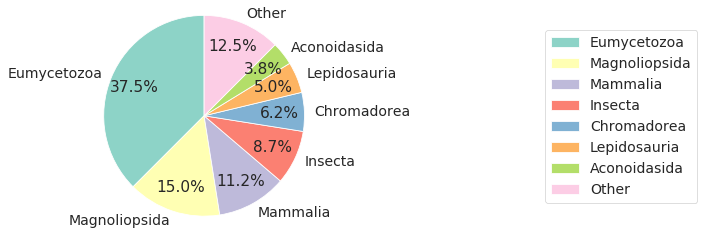

In [23]:
piechart = pd.DataFrame(plot_df['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']
piechart

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set3")


pc = piechart[piechart.Number >2].copy()
pc.loc[7] = ['Other', piechart[piechart.Number <=2].Number.sum()]


fig1, ax1 = plt.subplots()

pc.set_index('Taxonomic lineage (CLASS)').plot(y="Number", kind="pie", \
               counterclock=True, startangle=90, autopct='%1.1f%%', figsize=(4, 4), \
               pctdistance=0.75, labeldistance=1.1, radius=1.5, ax=ax1)
plt.legend(loc='center left', bbox_to_anchor=(2.0, 0.5))
plt.ylabel('');
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('../figs/toxins_organisms_predictions_uniprot.pdf',  bbox_inches='tight', pad_inches=0)
plt.show()

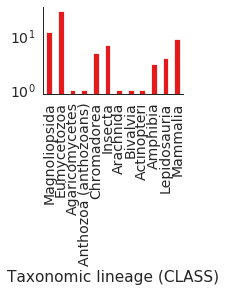

In [24]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set1")


sort_cols = [#'N/A',
    'Magnoliopsida',
    'Eumycetozoa',
    'Agaricomycetes',
    'Anthozoa (anthozoans)',
    'Chromadorea',
    'Insecta',
    'Arachnida',
    'Bivalvia',
    'Actinopteri',
    'Amphibia',
    'Lepidosauria',
    'Mammalia']


ax = piechart.set_index('Taxonomic lineage (CLASS)').transpose().sort_values(by=sort_cols)[sort_cols].transpose().plot(kind='bar',\
                             legend=None, figsize=(2.5, 1.6))

# plt.xticks([])
ax.set_yscale('log')
sns.despine()
# plt.savefig('../figs/toxins_organisms_predictions_uniprot_bar.pdf',  bbox_inches='tight', pad_inches=0)

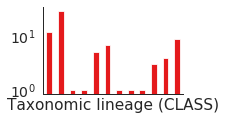

In [25]:
ax = piechart.set_index('Taxonomic lineage (CLASS)').transpose().sort_values(by=sort_cols)[sort_cols].transpose().plot(kind='bar',\
                             legend=None, figsize=(2.5, 1.6))

plt.xticks([])
ax.set_yscale('log')
sns.despine()
plt.savefig('../figs/toxins_organisms_predictions_uniprot_bar.pdf',  bbox_inches='tight', pad_inches=0)

In [28]:
# sns.set_context("paper", font_scale=1.5)
# plt.figure(figsize=(4, 14))

# sort_cols = [#'N/A',
#     'Magnoliopsida',
#     'Eumycetozoa',
#     'Agaricomycetes',
#     'Anthozoa (anthozoans)',
#     'Chromadorea',
#     'Insecta',
#     'Arachnida',
#     'Bivalvia',
#     'Actinopteri',
#     'Amphibia',
#     'Lepidosauria',
#     'Mammalia']

# plot_df['Heatmap'] = 1 #required for aggregation

# new_df = plot_df[['Heatmap','Protein families', 'Taxonomic lineage (CLASS)']]\
# .groupby(['Protein families', 'Taxonomic lineage (CLASS)']).count().reset_index()\
# .pivot_table(index='Protein families',
#              columns='Taxonomic lineage (CLASS)',
#              values='Heatmap')

# tt = new_df.copy().sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0)

# ax = sns.heatmap(tt , cmap='Blues')
# ax.invert_yaxis()
# plt.savefig('../figs/toxins_protein_families.pdf',  bbox_inches='tight', pad_inches=0)

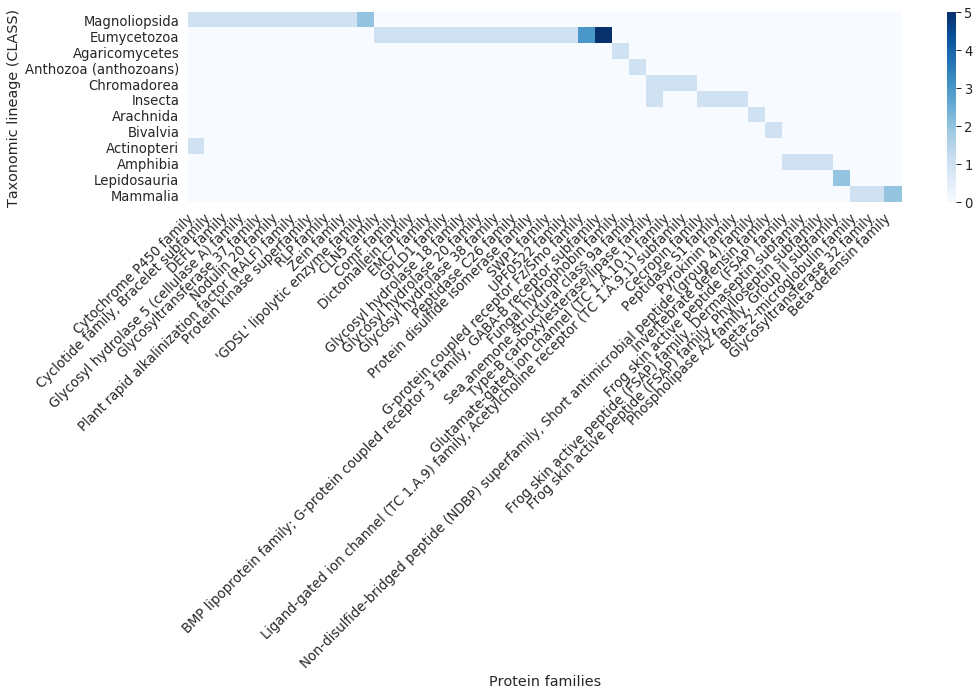

In [49]:
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(16, 3.5))

sort_cols = [#'N/A',
    'Magnoliopsida',
    'Eumycetozoa',
    'Agaricomycetes',
    'Anthozoa (anthozoans)',
    'Chromadorea',
    'Insecta',
    'Arachnida',
    'Bivalvia',
    'Actinopteri',
    'Amphibia',
    'Lepidosauria',
    'Mammalia']

plot_df['Heatmap'] = 1 #required for aggregation

new_df = plot_df[['Heatmap','Protein families', 'Taxonomic lineage (CLASS)']]\
.groupby(['Protein families', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Protein families',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')

tt = new_df.copy().sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0)

ax = sns.heatmap(tt.transpose() , cmap='Blues')
plt.xticks(rotation=45, ha='right');
# ax.invert_yaxis()
# plt.savefig('../figs/toxins_protein_families_predictions_uniprot.pdf',  bbox_inches='tight', pad_inches=0)

In [63]:
clustered_df[clustered_df['Protein families'].apply(lambda x: 'u' in str(x).lower())]#['Protein names'].values

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Protein families,Domain [CC],...,Allergenic properties,Involvement in disease,Toxic dose,Pharmaceutical use,Biotechnological use,Motif,Domain [FT],Transmembrane,Accession,Sequence
479,Q54HG9,RPN2_DICDI,reviewed,Dolichyl-diphosphooligosaccharide--protein gly...,swp1 rpn2 DDB_G0289479,Dictyostelium discoideum (Slime mold),685,"SIGNAL 1..18; /evidence=""ECO:0000255""",SWP1 family,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"TRANSMEM 591..611; /note=""Helical""; /evidenc...",sp|Q54HG9|RPN2_DICDI Dolichyl-diphosphooligosa...,MKLIILIVLSILISIVISGSVQSKITTTRGISNVYSKNDINNIKQF...


In [28]:
tt.sum().sum()

53.0

### Not in training but present in other datasets, because they dont have experimental evidence

In [27]:
# remove training set
known_tox = set(list(atp_annot[atp_annot['Taxonomic lineage (all)'].apply(lambda x: 'Eukaryota' in x)].Entry.values) + \
                list(toxin_kw[toxin_kw['Taxonomic lineage (all)'].apply(lambda x: 'Eukaryota' in x)].Entry.values)) - set(list(train.Entry.values))
len(known_tox)

7200

In [156]:
## Only SP

In [28]:
all_known_tox_df_ = pd.concat([atp_annot, toxin_kw, train]).drop_duplicates()
all_known_tox_df = all_known_tox_df_[all_known_tox_df_['Entry'].apply(lambda x: x in known_tox)]
all_known_tox_df = all_known_tox_df[~all_known_tox_df['Signal peptide'].isna()]
all_known_tox_df['Signal peptide'].apply(lambda x: '00269' in str(x)).value_counts()

False    3809
True      273
Name: Signal peptide, dtype: int64

In [29]:
all_known_tox_df

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,Date of creation,...,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),All,Protein,Cleavage,Aligned,Label,Accession
0,P49122,3SOF7_NAJAT,reviewed,Cytotoxin 7 (Cardiotoxin-7) (CTX7) (Ctx-7) (Ca...,NaN,Naja atra (Chinese cobra),82,"SIGNAL 1..21; /evidence=""ECO:0000255""",8656,1996-02-01,...,NaN,NaN,IPR003572;IPR003571;IPR018354;IPR035076;,PS00272;,NaN,NaN,NaN,NaN,NaN,NaN
3,P0DM60,A4A1_LOXIN,reviewed,Dermonecrotic toxin LiSicTox-alphaIVA1 (EC 4.6...,NaN,Loxosceles intermedia (Brown spider),299,"SIGNAL 1..18; /evidence=""ECO:0000255""",58218,2013-10-16,...,NaN,NaN,IPR017946;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Q9PW56,BNP2_BOTJA,reviewed,Bradykinin-potentiating and C-type natriuretic...,NaN,Bothrops jararaca (Jararaca) (Bothrops jajaraca),265,"SIGNAL 1..23; /evidence=""ECO:0000255""",8724,2006-10-03,...,NaN,NaN,IPR000663;IPR030480;,PS00263;,NaN,NaN,NaN,NaN,NaN,NaN
16,P0CAQ4,CA11A_CONAH,reviewed,Alpha-conotoxin-like Ac1.1a,NaN,Conus achatinus (Little frog cone),64,"SIGNAL 1..21; /evidence=""ECO:0000255""",369967,2009-06-16,...,NaN,NaN,IPR009958;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,P0CAQ5,CA11B_CONAH,reviewed,Alpha-conotoxin-like Ac1.1b,NaN,Conus achatinus (Little frog cone),64,"SIGNAL 1..21; /evidence=""ECO:0000255""",369967,2009-06-16,...,NaN,NaN,IPR009958;IPR018072;,PS60014;,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6301,Q9ZQX0,ALB1_GLYSO,reviewed,Albumin-1 (A1) [Cleaved into: Albumin-1 chain ...,NaN,Glycine soja (Wild soybean),119,"SIGNAL 1..19; /evidence=""ECO:0000255""",3848,2001-06-20,...,NaN,NaN,IPR012512;IPR032000;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,Q39837,ALB1_SOYBN,reviewed,Albumin-1 (A1) [Cleaved into: Albumin-1 chain ...,NaN,Glycine max (Soybean) (Glycine hispida),119,SIGNAL 1..19,3847,2001-06-20,...,NaN,NaN,IPR012512;IPR032000;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575,O22415,SNAIF_SAMNI,reviewed,Ribosome-inactivating protein SNAIf (Agglutini...,SNA-If LECSNA-If SNAIf,Sambucus nigra (European elder),570,"SIGNAL 1..28; /evidence=""ECO:0000250|UniProtK...",4202,2016-11-02,...,NaN,"DOMAIN 319..439; /note=""Ricin B-type lectin 1...",IPR036041;IPR017989;IPR001574;IPR017988;IPR016...,PS50231;PS00275;,NaN,NaN,NaN,NaN,NaN,NaN
7031,P32032,THN2_WHEAT,reviewed,Alpha-2-purothionin [Cleaved into: Alpha-2-pur...,THI1.2 PUR-B1,Triticum aestivum (Wheat),136,SIGNAL 1..27,4565,1993-07-01,...,NaN,NaN,IPR001010;IPR036391;,PS00271;,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# These were identified as highly probable toxins

known_identified = df_uniprot[df_uniprot['Entry'].apply(lambda x: x in known_tox)].copy()
known_identified.shape, known_identified[~known_identified['Signal peptide'].isna()].shape

((759, 29), (759, 29))

In [34]:
known_identified[known_identified['Signal peptide'].apply(lambda x: 'ECO:0000269' not in str(x))]

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Protein families,Domain [CC],...,Allergenic properties,Involvement in disease,Toxic dose,Pharmaceutical use,Biotechnological use,Motif,Domain [FT],Transmembrane,Accession,Sequence
1,A8HDK4,3L21_TROCA,reviewed,Long neurotoxin 1 (LNTX-1),NaN,Tropidechis carinatus (Australian rough-scaled...,93,"SIGNAL 1..21; /evidence=""ECO:0000250""","Snake three-finger toxin family, Long-chain su...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|A8HDK4|3L21_TROCA Long neurotoxin 1 OS=Trop...,MKTLLLTLVVVTIVCLDLGNSFSCYKTPHVKSEPCAPGQNLCYTKT...
3,F8J2F2,3L220_DRYCN,reviewed,Long neurotoxin 20 (LNTX-20) (Long neurotoxin ...,NaN,Drysdalia coronoides (White-lipped snake) (Hop...,88,"SIGNAL 1..21; /evidence=""ECO:0000250""","Snake three-finger toxin family, Long-chain su...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|F8J2F2|3L220_DRYCN Long neurotoxin 20 OS=Dr...,MKTLLLTLVVVTIVCLDLGNSFSCYKTPYVKSEPCAPGENLCYTKS...
4,P17696,3SIYL_DENAN,reviewed,Synergistic-like venom protein,NaN,Dendroaspis angusticeps (Eastern green mamba) ...,86,"SIGNAL 1..21; /evidence=""ECO:0000255""","Snake three-finger toxin family, Short-chain s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|P17696|3SIYL_DENAN Synergistic-like venom p...,MKTLLLTLVVVTIVCLDLGYTLTCVTGKSIGGISTEECAAGQKICF...
9,Q53B61,3NO2_OPHHA,reviewed,Weak neurotoxin OH-72 (Fragment),NaN,Ophiophagus hannah (King cobra) (Naja hannah),81,"SIGNAL <1..16; /evidence=""ECO:0000255""","Snake three-finger toxin family, Non-conventio...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q53B61|3NO2_OPHHA Weak neurotoxin OH-72 (Fr...,LTLVVVTIVCLDLGYTLTCLICPEEYCKRIHTCRDGENVCFKGFYE...
10,P60814,3NO2I_NAJAT,reviewed,Probable weak neurotoxin NNAM2I,NaN,Naja atra (Chinese cobra),86,"SIGNAL 1..21; /evidence=""ECO:0000250""","Snake three-finger toxin family, Non-conventio...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|P60814|3NO2I_NAJAT Probable weak neurotoxin...,MKTLPLTLVVVTIVCLDLGYTLTCLNCPEMFCGKFQICRNGEKICF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,Q8AY50,3NO22_BUNCA,reviewed,Weak toxin 2,NaN,Bungarus candidus (Malayan krait),86,"SIGNAL 1..23; /evidence=""ECO:0000255""","Snake three-finger toxin family, Non-conventio...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q8AY50|3NO22_BUNCA Weak toxin 2 OS=Bungarus...,MKTLLLTLVVVAIVCLDLGYTLTCLICPEKDCQKVHTCRNEEKICV...
904,Q9W717,3SO1_NAJAT,reviewed,Neurotoxin-like protein NTL2,NaN,Naja atra (Chinese cobra),86,"SIGNAL 1..21; /evidence=""ECO:0000250""","Snake three-finger toxin family, Short-chain s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|Q9W717|3SO1_NAJAT Neurotoxin-like protein N...,MKTLLLSLVVVTIVCLDLGYTRLCLSDYSIFSETIEICPDGHNFCF...
905,U3EPL2,3SX_MICFL,reviewed,Three-finger toxin 3b (3FTx 3b),NaN,Micrurus fulvius (Eastern coral snake) (Colube...,84,"SIGNAL 1..21; /evidence=""ECO:0000255""","Snake three-finger toxin family, Short-chain s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|U3EPL2|3SX_MICFL Three-finger toxin 3b OS=M...,MKTLLLTLVVVTIVCLDLGNSLKCYSSRTETMTCPEGEDKCEKYAA...
906,A7X4R0,3L2O2_OXYMI,reviewed,Long neurotoxin 3FTx-Oxy2,NaN,Oxyuranus microlepidotus (Inland taipan) (Diem...,92,"SIGNAL 1..21; /evidence=""ECO:0000250""","Snake three-finger toxin family, Long-chain su...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp|A7X4R0|3L2O2_OXYMI Long neurotoxin 3FTx-Oxy...,MKTLLLTLVVVTIVCLDLGYTRRCFTTPSVRSERCPPGQEVCYTKT...


In [277]:
# for i in [3, 4, 5]:
#     ptx = probable_sp[probable_sp['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == i]
#     ptx = ptx['Accession'].apply(lambda x: x.split('|')[1] in all_toxins_sp_euk).copy()
#     print('For {} positive predictions: {} toxins identified.'.format(i, ptx.shape[0]))

In [38]:
known_identified['Heatmap'] = 1

In [39]:
known_identified['Protein fam.'] = known_identified['Protein families'].apply(lambda x: np.nan if str(x) == 'nan' else str(x).split(', ')[0])
known_identified['Protein fam.'].value_counts()

Snake three-finger toxin family                     209
Phospholipase A2 family                             145
Snaclec family                                       98
Long (4 C-C) scorpion toxin superfamily              86
Venom Kunitz-type family                             64
Short scorpion toxin superfamily                     31
Non-disulfide-bridged peptide (NDBP) superfamily     25
Snake waprin family                                  22
Long (3 C-C) scorpion toxin superfamily              14
True venom lectin family                             13
Conotoxin O1 superfamily                              6
Conotoxin I2 superfamily                              6
Scolopendra neurotoxin 3 family                       4
Ribosome-inactivating protein family                  4
Long chain scorpion toxin family                      3
Scoloptoxin-03 family                                 2
Scoloptoxin-13 family                                 2
Scoloptoxin-15 family                           

In [46]:
known_identified[known_identified['Protein families'].apply(lambda x: 'SLPTX' in str(x))]

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Protein families,Domain [CC],...,Toxic dose,Pharmaceutical use,Biotechnological use,Motif,Domain [FT],Transmembrane,Accession,Sequence,Heatmap,Protein fam.
402,V5N6J4,TXF2A_SCOSU,reviewed,U-scoloptoxin(15)-Ssm2a (U-SLPTX(15)-Ssm2a) (S...,NaN,Scolopendra subspinipes (Vietnamese centipede),78,"SIGNAL 1..23; /evidence=""ECO:0000255""",SLPTX(15) family,DOMAIN: Has the structural arrangement of an a...,...,NaN,NaN,NaN,NaN,NaN,NaN,sp|V5N6J4|TXF2A_SCOSU U-scoloptoxin(15)-Ssm2a ...,MEKKIIFLCFFVSLLTLPEFISSQVLVEDDVPFPEKKFADRGECIR...,1,SLPTX(15) family


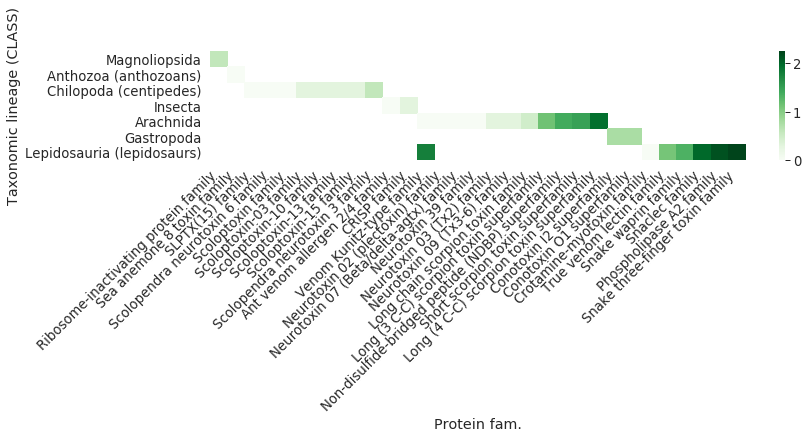

In [35]:
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(12, 2))


sort_cols = [#'N/A',
#     'Caudoviricetes',

    'Magnoliopsida',
#     'Eumycetozoa',
#     'Agaricomycetes',
#     'Chromadorea',
        'Anthozoa (anthozoans)',
    'Chilopoda (centipedes)',
    'Insecta',
    'Arachnida',
    'Gastropoda',
#     'Bivalvia',

#     'Actinopteri',
#     'Amphibia',
    'Lepidosauria (lepidosaurs)',
#     'Mammalia',
]

new_df = known_identified[['Heatmap','Protein fam.', 'Taxonomic lineage (CLASS)']]\
.groupby(['Protein fam.', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Protein fam.',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')

tt = new_df.copy().sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0)

# log_norm = LogNorm(vmin=tt.min().min(), vmax=tt.max().max())
# cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(tt.min().min())), 1+math.ceil(tt.log10(tt.max().max())))]

tt = tt.replace(0, np.nan)



ax = sns.heatmap(np.log10(tt.transpose()) , cmap='Greens', vmax=2.25, vmin=0)
plt.xticks(rotation=45, ha='right');
# ax.invert_yaxis()
plt.savefig('../figs/known_toxins_protein_families.pdf',  bbox_inches='tight', pad_inches=0)

In [36]:
## Known identified with domains
tt.sum().sum()

753.0

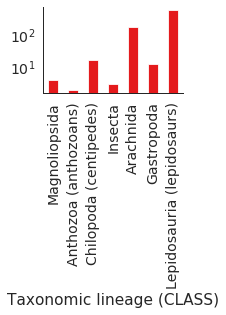

In [205]:
piechart = pd.DataFrame(known_identified['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']
piechart

sns.set_style("white")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set1")

sort_cols = [#'N/A',
#     'Caudoviricetes',

    'Magnoliopsida',
#     'Eumycetozoa',
#     'Agaricomycetes',
#     'Chromadorea',
        'Anthozoa (anthozoans)',
    'Chilopoda (centipedes)',
    'Insecta',
    'Arachnida',
    'Gastropoda',
#     'Bivalvia',

#     'Actinopteri',
#     'Amphibia',
    'Lepidosauria (lepidosaurs)',
#     'Mammalia',
]



pc = piechart[piechart.Number >1].copy()
# pc.loc[7] = ['Other', piechart[piechart.Number <=1].Number.sum()]
# pc['Number'] = np.log10(pc['Number'])

ax = piechart.set_index('Taxonomic lineage (CLASS)').transpose().sort_values(by=sort_cols)[sort_cols].transpose().plot(kind='bar',\
                             legend=None, figsize=(2.5, 1.6))

# plt.xticks([])
ax.set_yscale('log')
sns.despine()

# plt.savefig('../figs/known_toxins_organisms_bar.pdf',  bbox_inches='tight', pad_inches=0)

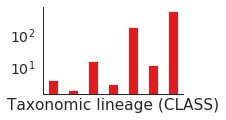

In [204]:
ax = piechart.set_index('Taxonomic lineage (CLASS)').transpose().sort_values(by=sort_cols)[sort_cols].transpose().plot(kind='bar',\
                             legend=None, figsize=(2.5, 1.6))

plt.xticks([])
ax.set_yscale('log')
sns.despine()
plt.savefig('../figs/known_toxins_organisms_bar.pdf',  bbox_inches='tight', pad_inches=0)

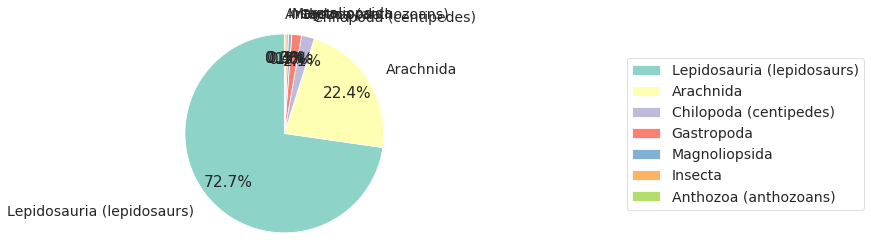

In [206]:
piechart = pd.DataFrame(known_identified['Taxonomic lineage (CLASS)'].value_counts())
piechart = piechart.reset_index()
piechart.columns = ['Taxonomic lineage (CLASS)', 'Number']
piechart

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Set3")


pc = piechart[piechart.Number >1].copy()
pc.loc[7] = ['Other', piechart[piechart.Number <=1].Number.sum()]


fig1, ax1 = plt.subplots()

pc.set_index('Taxonomic lineage (CLASS)').plot(y="Number", kind="pie", \
               counterclock=True, startangle=90, autopct='%1.1f%%', figsize=(4, 4), \
               pctdistance=0.75, labeldistance=1.2, radius=1.8, ax=ax1)
plt.legend(loc='center left', bbox_to_anchor=(2.0, 0.5))
plt.ylabel('');
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.savefig('../figs/known_toxins_organisms.pdf',  bbox_inches='tight', pad_inches=0)

plt.show()

In [40]:
pc['Percent'] = pc['Number'] * 100 / pc['Number'].sum()
pc

,Taxonomic lineage (CLASS),Number,Percent
0,Lepidosauria (lepidosaurs),552,72.727273
1,Arachnida,170,22.397892
2,Chilopoda (centipedes),16,2.108037
3,Gastropoda,12,1.581028
4,Magnoliopsida,4,0.527009
5,Insecta,3,0.395257
6,Anthozoa (anthozoans),2,0.263505
7,Other,0,0.000000


#### GO annotation

In [41]:
clustered_df[clustered_df['Taxonomic lineage (CLASS)'] == 'Revtraviricetes']

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Protein families,Domain [CC],...,Allergenic properties,Involvement in disease,Toxic dose,Pharmaceutical use,Biotechnological use,Motif,Domain [FT],Transmembrane,Accession,Sequence
312,P27977,ENV_SIVVG,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,env,Simian immunodeficiency virus agm.vervet (isol...,877,"SIGNAL 1..19; /evidence=""ECO:0000255""",NaN,DOMAIN: Some of the most genetically diverse r...,...,NaN,NaN,NaN,NaN,NaN,"MOTIF 739..742; /note=""YXXL motif; contains e...",NaN,"TRANSMEM 708..728; /note=""Helical""; /evidenc...",sp|P27977|ENV_SIVVG Envelope glycoprotein gp16...,MKLTLLIGILLIGIGVVLNTRQQWVTVFYGVPVWKNSSVQAFCMTP...
1026,Q8AIH5,ENV_SIVTN,reviewed,Envelope glycoprotein gp160 (Env polyprotein) ...,NaN,Simian immunodeficiency virus (isolate TAN1) (...,871,"SIGNAL 1..21; /evidence=""ECO:0000255""",NaN,DOMAIN: Some of the most genetically diverse r...,...,NaN,NaN,NaN,NaN,NaN,"MOTIF 713..716; /note=""YXXL motif; contains e...",NaN,"TRANSMEM 685..705; /note=""Helical""; /evidenc...",sp|Q8AIH5|ENV_SIVTN Envelope glycoprotein gp16...,MKNLIGITLILIITILGIGFSTYYTTVFYGVPVWKEAQPTLFCASD...


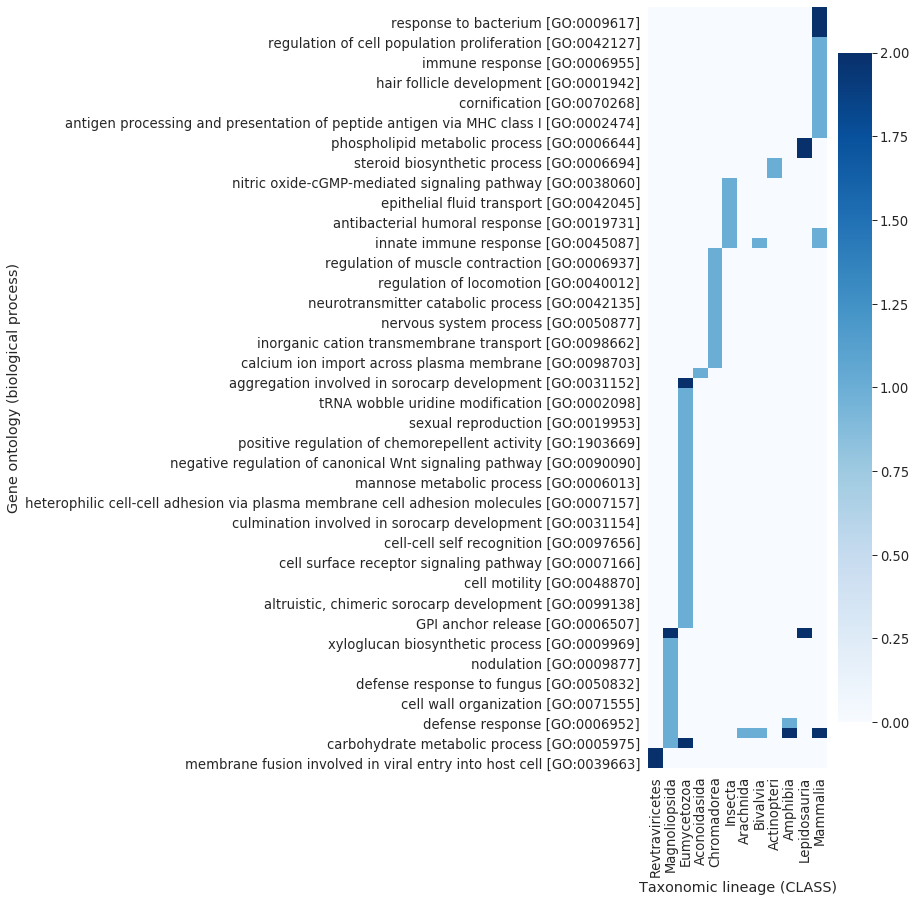

In [42]:
test1 = plot_df[['Gene ontology (biological process)','Protein families', 'Taxonomic lineage (CLASS)']].copy()
test1['Gene ontology (biological process)'] = test1['Gene ontology (biological process)'].str.split('; ')
test1 = test1.explode(column='Gene ontology (biological process)')

test1['Heatmap'] = 1
new_df1 = test1[['Gene ontology (biological process)','Heatmap', 'Taxonomic lineage (CLASS)']]\
.groupby(['Gene ontology (biological process)', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Gene ontology (biological process)',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')


sort_cols = [#'N/A',
    'Revtraviricetes',
#     'Pokkesviricetes',
    
    
#  'Megaviricetes',
#  'Insthoviricetes',
 
#  'Pinopsida',
 'Magnoliopsida',
    'Eumycetozoa',
#     'Agaricomycetes',
#  'Saccharomycetes',
#  'Sordariomycetes',
#  'Aconoidasida',
    'Aconoidasida',
 'Chromadorea',
 'Insecta',
    'Arachnida',
#  'Gastropoda',
    'Bivalvia',
#     'Anthozoa (anthozoans)',
 'Actinopteri',
 'Amphibia',
 'Lepidosauria',
 'Mammalia']

sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(4, 14))

ax = sns.heatmap(new_df1.sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0), cmap='Blues')
ax.invert_yaxis()
plt.savefig('../figs/toxins_GO_(biological_process).pdf',  bbox_inches='tight', pad_inches=0)

In [43]:
print('{} sequences have annotated GO biological process.'.format(clustered_df.shape[0] - len(clustered_df[clustered_df['Gene ontology (biological process)'].isna()]['Entry'].values)))

46 sequences have annotated GO biological process.


In [44]:
# test1['Taxonomic lineage (CLASS)'].value_counts()
new_df1.columns

Index(['Aconoidasida', 'Actinopteri', 'Amphibia', 'Arachnida', 'Bivalvia',
       'Chromadorea', 'Eumycetozoa', 'Insecta', 'Lepidosauria',
       'Magnoliopsida', 'Mammalia', 'Revtraviricetes'],
      dtype='object', name='Taxonomic lineage (CLASS)')

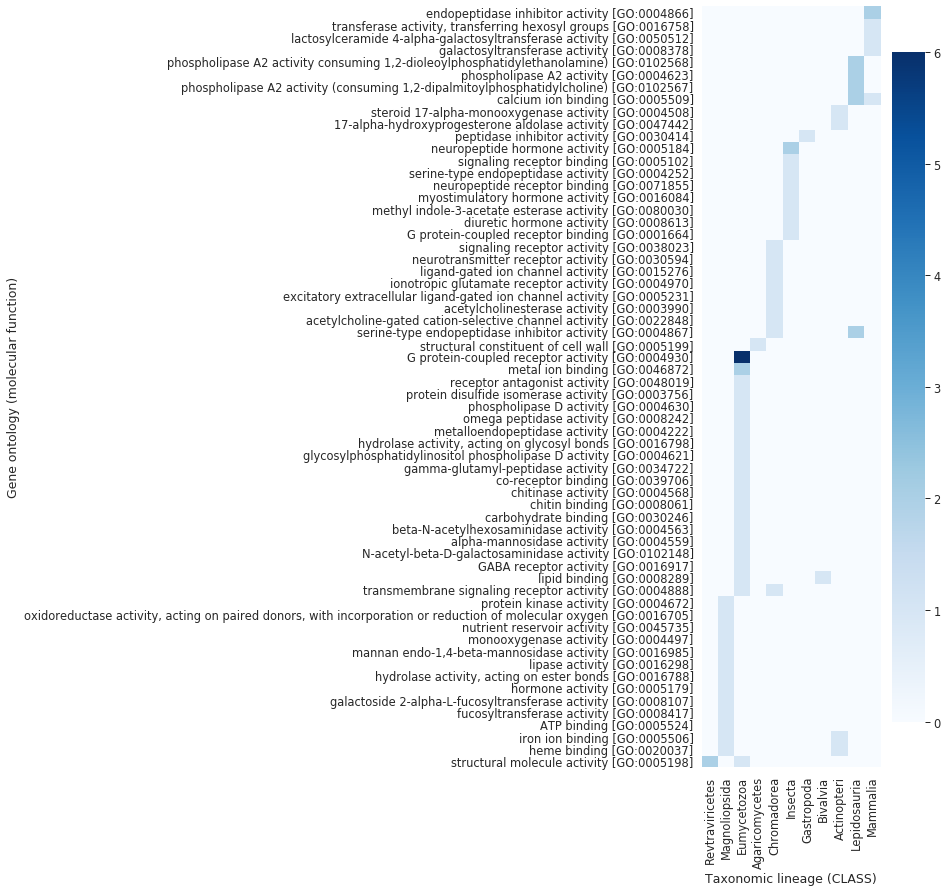

In [45]:
test1 = plot_df[['Gene ontology (molecular function)','Protein families', 'Taxonomic lineage (CLASS)']].copy()
test1['Gene ontology (molecular function)'] = test1['Gene ontology (molecular function)'].str.split('; ')
test1 = test1.explode(column='Gene ontology (molecular function)')

test1['Heatmap'] = 1
new_df1 = test1[['Gene ontology (molecular function)','Heatmap', 'Taxonomic lineage (CLASS)']]\
.groupby(['Gene ontology (molecular function)', 'Taxonomic lineage (CLASS)']).count().reset_index()\
.pivot_table(index='Gene ontology (molecular function)',
             columns='Taxonomic lineage (CLASS)',
             values='Heatmap')


sort_cols = [#'N/A',
    'Revtraviricetes',
#     'Pokkesviricetes',
    
    
#  'Megaviricetes',
#  'Insthoviricetes',
 
#  'Pinopsida',
 'Magnoliopsida',
    'Eumycetozoa',
    'Agaricomycetes',
#  'Saccharomycetes',
#  'Sordariomycetes',
#  'Aconoidasida',
#     'Aconoidasida',
 'Chromadorea',
 'Insecta',
#     'Arachnida',
 'Gastropoda',
    'Bivalvia',
#     'Anthozoa (anthozoans)',
 'Actinopteri',
#  'Amphibia',
 'Lepidosauria',
 'Mammalia']

sns.set_context("paper", font_scale=1.3)
plt.figure(figsize=(4, 14))

ax = sns.heatmap(new_df1.sort_values(by=sort_cols, ascending=True)[sort_cols].fillna(0), cmap='Blues')
ax.invert_yaxis()
plt.savefig('../figs/toxins_GO_(molecular function).pdf',  bbox_inches='tight', pad_inches=0)

In [66]:
print('{} sequences have annotated GO molecular function.'.format(clustered_df.shape[0] - len(clustered_df[clustered_df['Gene ontology (molecular function)'].isna()]['Entry'].values)))

49 sequences have annotated GO molecular function.


#### Total known toxins and identified toxins

In [119]:
tox_fung['Entry'] = tox_fung['Accession'].str.split('|').apply(lambda x: x[1])

7         Q55B10
14        A7J2C6
17        P18791
30        P25371
31        Q10741
           ...  
562985    P17634
562988    Q9Y680
563007    Q9LZX4
563027    P54803
563047    P11242
Name: Entry, Length: 51184, dtype: object

In [128]:
all_known_tox_df

,Entry,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,Taxonomic lineage IDs,Date of creation,...,Motif,Domain [FT],Cross-reference (InterPro),Cross-reference (PROSITE),All,Protein,Cleavage,Aligned,Label,Accession
0,P49122,3SOF7_NAJAT,reviewed,Cytotoxin 7 (Cardiotoxin-7) (CTX7) (Ctx-7) (Ca...,NaN,Naja atra (Chinese cobra),82,"SIGNAL 1..21; /evidence=""ECO:0000255""",8656,1996-02-01,...,NaN,NaN,IPR003572;IPR003571;IPR018354;IPR035076;,PS00272;,NaN,NaN,NaN,NaN,NaN,NaN
3,P0DM60,A4A1_LOXIN,reviewed,Dermonecrotic toxin LiSicTox-alphaIVA1 (EC 4.6...,NaN,Loxosceles intermedia (Brown spider),299,"SIGNAL 1..18; /evidence=""ECO:0000255""",58218,2013-10-16,...,NaN,NaN,IPR017946;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Q9PW56,BNP2_BOTJA,reviewed,Bradykinin-potentiating and C-type natriuretic...,NaN,Bothrops jararaca (Jararaca) (Bothrops jajaraca),265,"SIGNAL 1..23; /evidence=""ECO:0000255""",8724,2006-10-03,...,NaN,NaN,IPR000663;IPR030480;,PS00263;,NaN,NaN,NaN,NaN,NaN,NaN
16,P0CAQ4,CA11A_CONAH,reviewed,Alpha-conotoxin-like Ac1.1a,NaN,Conus achatinus (Little frog cone),64,"SIGNAL 1..21; /evidence=""ECO:0000255""",369967,2009-06-16,...,NaN,NaN,IPR009958;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,P0CAQ5,CA11B_CONAH,reviewed,Alpha-conotoxin-like Ac1.1b,NaN,Conus achatinus (Little frog cone),64,"SIGNAL 1..21; /evidence=""ECO:0000255""",369967,2009-06-16,...,NaN,NaN,IPR009958;IPR018072;,PS60014;,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6301,Q9ZQX0,ALB1_GLYSO,reviewed,Albumin-1 (A1) [Cleaved into: Albumin-1 chain ...,NaN,Glycine soja (Wild soybean),119,"SIGNAL 1..19; /evidence=""ECO:0000255""",3848,2001-06-20,...,NaN,NaN,IPR012512;IPR032000;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,Q39837,ALB1_SOYBN,reviewed,Albumin-1 (A1) [Cleaved into: Albumin-1 chain ...,NaN,Glycine max (Soybean) (Glycine hispida),119,SIGNAL 1..19,3847,2001-06-20,...,NaN,NaN,IPR012512;IPR032000;,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575,O22415,SNAIF_SAMNI,reviewed,Ribosome-inactivating protein SNAIf (Agglutini...,SNA-If LECSNA-If SNAIf,Sambucus nigra (European elder),570,"SIGNAL 1..28; /evidence=""ECO:0000250|UniProtK...",4202,2016-11-02,...,NaN,"DOMAIN 319..439; /note=""Ricin B-type lectin 1...",IPR036041;IPR017989;IPR001574;IPR017988;IPR016...,PS50231;PS00275;,NaN,NaN,NaN,NaN,NaN,NaN
7031,P32032,THN2_WHEAT,reviewed,Alpha-2-purothionin [Cleaved into: Alpha-2-pur...,THI1.2 PUR-B1,Triticum aestivum (Wheat),136,SIGNAL 1..27,4565,1993-07-01,...,NaN,NaN,IPR001010;IPR036391;,PS00271;,NaN,NaN,NaN,NaN,NaN,NaN


#### These were identified by us but are toxins from bacteriophages

In [215]:
# pd.concat([final, known_identified, df_uniprot]).drop_duplicates()
set(df_uniprot.Entry.values) - set(list(final.Entry.values) + list(known_identified.Entry.values)\
                                  +list(bacteria.Entry.values) + list(archaea.Entry.values) + list(trans.Entry.values))

{'P08026', 'P10149', 'Q779K4'}

In [219]:
df_uniprot[df_uniprot.Entry.apply(lambda x: x in {'P08026', 'P10149', 'Q779K4'})]['Taxonomic lineage (all)'].values

array(['Viruses, Duplodnaviria, Heunggongvirae, Uroviricota, Caudoviricetes, Caudovirales, Siphoviridae (phages with long non-contractile tails), Lambdavirus, unclassified Lambdavirus, Enterobacteria phage H19B (Bacteriophage H19B)',
       'Viruses, Duplodnaviria, Heunggongvirae, Uroviricota, Caudoviricetes, Caudovirales, Podoviridae (phages with short tails), Sepvirinae, Traversvirus, unclassified Traversvirus, Shigella phage 7888 (Shigella sonnei bacteriophage 7888)',
       'Viruses, unclassified viruses, unclassified bacterial viruses, Bacteriophage H30'],
      dtype=object)

In [133]:
all_iden = []

# remove training seq

count_dfs = tox_fung[tox_fung.Entry.apply(lambda x: x not in train.Entry.values)]

for i in [1, 2, 3, 4, 5]:
    sp_ = count_dfs[count_dfs['SP'].apply(lambda x: (x == True).sum()) == i].copy()
    for j in [1, 2, 3, 4, 5]:
        tox_ = sp_[sp_['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == j].copy()
        t = tox_[tox_.Entry.apply(lambda x: x in all_known_tox_df.Entry.values)]
        print("For {}* SP, toxins identified with {}* = {}".format(i, j, t.shape[0]))
        all_iden.append(t.shape[0])
    print('\n===\n')

print('Total predicted toxins = {} out of {} annotated toxins.'.format(np.sum(all_iden), len(all_known_tox_df)))

For 1* SP, toxins identified with 1* = 0
For 1* SP, toxins identified with 2* = 0
For 1* SP, toxins identified with 3* = 0
For 1* SP, toxins identified with 4* = 0
For 1* SP, toxins identified with 5* = 1

===

For 2* SP, toxins identified with 1* = 0
For 2* SP, toxins identified with 2* = 1
For 2* SP, toxins identified with 3* = 0
For 2* SP, toxins identified with 4* = 0
For 2* SP, toxins identified with 5* = 5

===

For 3* SP, toxins identified with 1* = 2
For 3* SP, toxins identified with 2* = 1
For 3* SP, toxins identified with 3* = 1
For 3* SP, toxins identified with 4* = 0
For 3* SP, toxins identified with 5* = 0

===

For 4* SP, toxins identified with 1* = 3
For 4* SP, toxins identified with 2* = 1
For 4* SP, toxins identified with 3* = 0
For 4* SP, toxins identified with 4* = 5
For 4* SP, toxins identified with 5* = 6

===

For 5* SP, toxins identified with 1* = 134
For 5* SP, toxins identified with 2* = 97
For 5* SP, toxins identified with 3* = 58
For 5* SP, toxins identified 

In [136]:
all_iden = pd.DataFrame(columns=['SP', 'Toxin', 'Counts'], index=np.arange(1, 26))
# Index = SP
# Col = toxin

idx = 1
for i in [1, 2, 3, 4, 5]:
    sp_ = tox_fung[tox_fung['SP'].apply(lambda x: (x == True).sum()) == i].copy()
    for j in [1, 2, 3, 4, 5]:
        tox_ = sp_[sp_['Toxin_Preds'].apply(lambda x: (x ==True).sum()) == j].copy()
        t = tox_[tox_.Entry.apply(lambda x: x in all_known_tox_df.Entry.values)]
        all_iden.loc[idx] = [i, j, t.shape[0]]# np.log10()]
        idx += 1
all_iden


,SP,Toxin,Counts
1,1,1,0
2,1,2,0
3,1,3,0
4,1,4,0
5,1,5,1
6,2,1,0
7,2,2,1
8,2,3,0
9,2,4,0
10,2,5,5


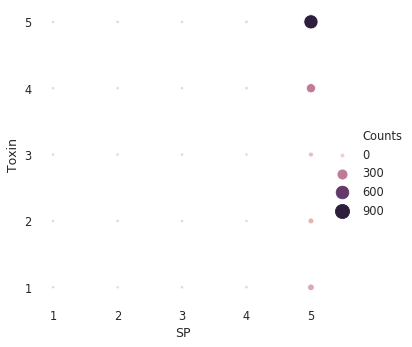

In [138]:
# all_iden['Log(Counts)'] = all_iden[['Counts']].astype(int).apply(np.log10)

sns.set_style('white')




g = sns.relplot(
    data=all_iden,
    x="SP", y="Toxin",
     size="Counts", hue="Counts",
#     palette=cmap, 
    sizes=(10, 200),
)

# g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True);
g.ax.set_yticklabels(['', 1, '', 2, '', 3, '', 4, '', 5]);

# plt.savefig('../figs/Identified_toxins_counts.pdf',  bbox_inches='tight', pad_inches=0)